Обучим нейронную сеть для задачи регрессии:

Возьмем более сложную функцию в качестве таргета: $$y=2^x sin(2^{-x}).$$

Кроме того, мы хотим получить хорошую метрику MAE на валидации: $${MAE} = {\frac {1}{l}}\sum _{i=1}^{l}{|y\_pred_{i}-{y\_target_{i}}|},$$ тогда как знакомая нам MSE выглядит как $${MSE} = {\frac {1}{l}}\sum _{i=1}^{l}(y\_pred_{i}-{y\_target_{i}})^{2}$$
 

Вот пример того, как нейросеть может отрабатывать на данной функции:
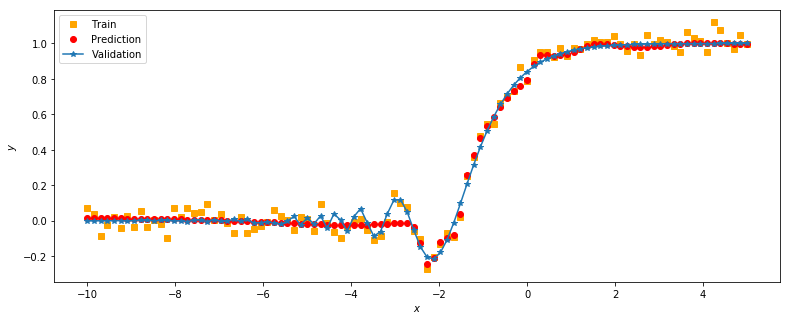
Данный пример показывает MAE на валидации ~0.021 . Получите метрику не хуже 0.03

Что можно варьировать: 

1) Архитектуру сети

2) loss-функцию

3) lr оптимизатора

4) Количество эпох в обучении

Удачи!

In [ ]:
import torch

def target_function(x):
    return 2**x * torch.sin(2**-x)

class RegressionNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(RegressionNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons) 
        self.act1 = torch.nn.Sigmoid()                  
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1) 

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

net = RegressionNet(60)

# ------Dataset preparation start--------:
x_train =  torch.linspace(-10, 5, 100)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)
# ------Dataset preparation end--------:


optimizer = torch.optim.Adam(net.parameters(), lr=0.021)

def loss(pred, target):
    squares = abs(pred - target) # MAE
    return squares.mean() # Среднее значение

for epoch_index in range(2000):
    optimizer.zero_grad()
    y_pred = net.forward(x_train)
    loss_val = loss(y_pred, y_train)   # функция потерь(получаем скаляр)

    loss_val.backward()

    optimizer.step()

# # Проверка осуществляется вызовом кода:
# def metric(pred, target):
#    return (pred - target).abs().mean()

# print(metric(net.forward(x_validation), y_validation).item())
# #(раскомментируйте, если решаете задание локально)

0.029211407527327538
